In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:

df = pd.read_csv("Zomato data .csv", encoding= 'unicode_escape')

In [5]:
df.head(10)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8/5,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,800,Buffet
7,Onesta,Yes,Yes,4.6/5,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0/5,324,700,other
9,Smacznego,Yes,No,4.2/5,504,550,Cafes


In [6]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [16]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

df['rate']=df['rate'].apply(handleRate)
df
    

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [27]:
neww=df[['name','rate']].sort_values(by="rate" ,ascending=False).head(6)
neww

,name,rate
44,Onesta,4.6
7,Onesta,4.6
38,Empire Restaurant,4.4
86,Meghana Foods,4.4
52,Corner House Ice Cream,4.3
37,Szechuan Dragon,4.2


*top 5 Rated Restaurants*


C:\Users\ISHIT\AppData\Local\Temp\ipykernel_29932\828512083.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=neww,x='name',y='rate',palette='spring')


<Axes: xlabel='name', ylabel='rate'>

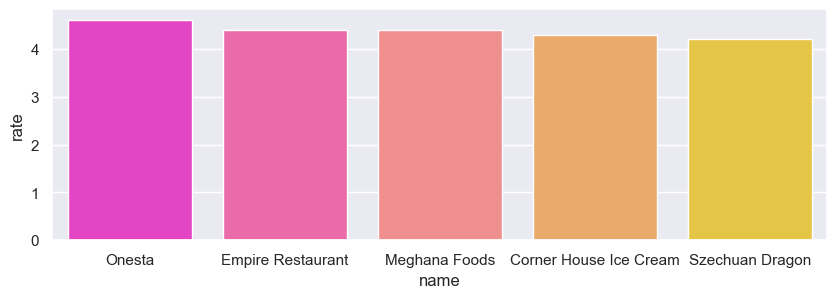

In [35]:
sns.set(rc={'figure.figsize':(10,3)})
sns.barplot(data=neww,x='name',y='rate',palette='spring')

*type of restro preffered*



C:\Users\ISHIT\AppData\Local\Temp\ipykernel_29932\1808284086.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="listed_in(type)",data=df,palette="GnBu")


Text(0.5, 0, 'type of restaurants')

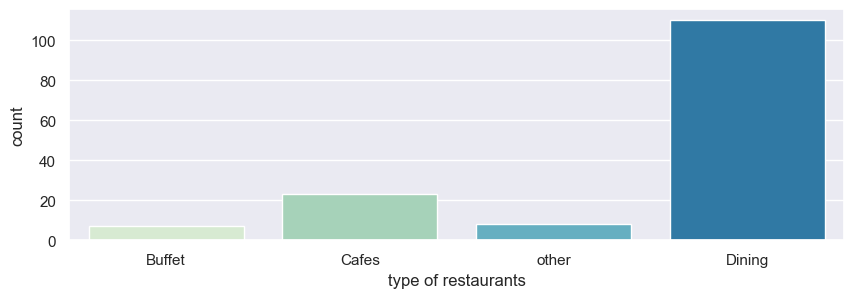

In [41]:
sns.countplot(x="listed_in(type)",data=df,palette="GnBu")
plt.xlabel('type of restaurants')

In [47]:
neww=df.groupby(["listed_in(type)"],as_index=False)["votes"].sum()
neww

,listed_in(type),votes
0,Buffet,3028
1,Cafes,6434
2,Dining,20363
3,other,9367


*votes vs restro type*

Text(0.5, 0, 'type of restaurants')

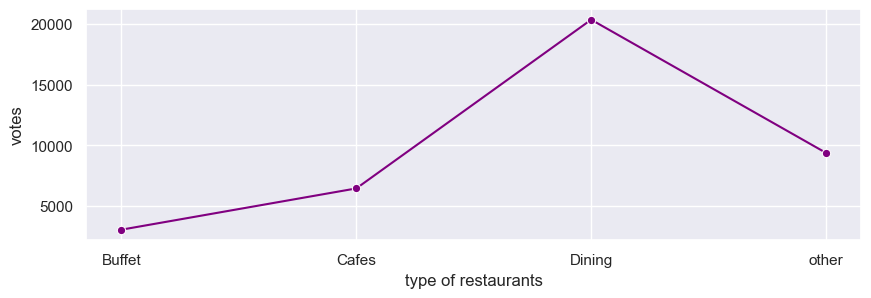

In [51]:
sns.lineplot(data=neww,x="listed_in(type)",y="votes",marker="o" ,c="purple")
plt.xlabel('type of restaurants')

*majority rating*

In [58]:
neww=df.groupby(["rate"])["rate"].count()
neww

rate
2.6     1
2.8     2
2.9     7
3.0     2
3.1     7
3.2     7
3.3    14
3.4    12
3.5     6
3.6    11
3.7    15
3.8    20
3.9    10
4.0    10
4.1    11
4.2     8
4.3     1
4.4     2
4.6     2
Name: rate, dtype: int64

<Axes: xlabel='rate', ylabel='count'>

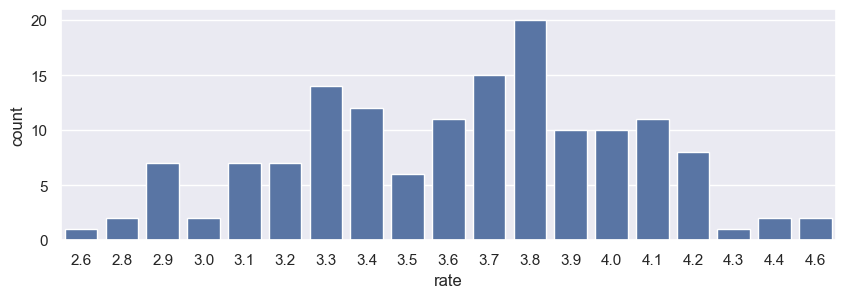

In [53]:
sns.countplot(x=df["rate"],data=df)

In [59]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


avg order spend

In [84]:
cost_table = df.groupby('approx_cost(for two people)').size().reset_index(name='count')
cost_table


approx_cost(for two people)
100     6
150    16
200    16
250     6
300    23
350     3
400    15
450     6
500    14
550     3
600    13
650     2
700     5
750     3
800    12
850     2
900     2
950     1
dtype: int64

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

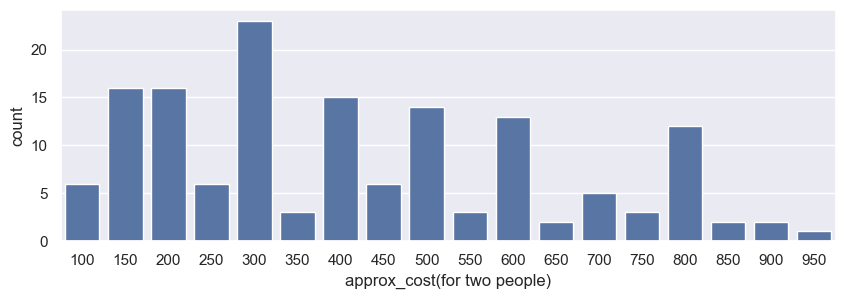

In [60]:
sns.countplot(data=df,x="approx_cost(for two people)")

In [66]:
neww=df.groupby(['online_order'],as_index=False)['rate'].max()
neww

,online_order,rate
0,No,4.3
1,Yes,4.6


<Axes: xlabel='online_order', ylabel='rate'>

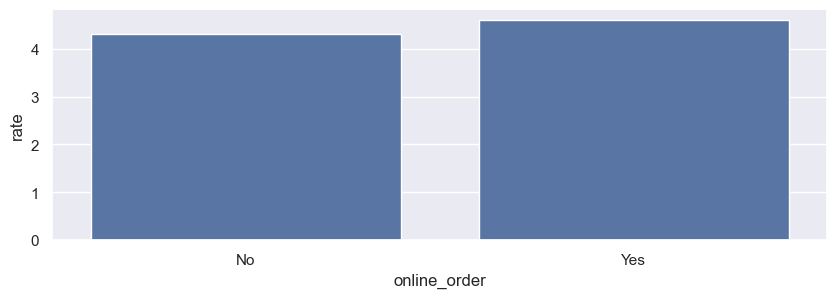

In [67]:
sns.barplot(data=neww,x="online_order",y="rate")

In [71]:
neww=df.groupby(['online_order'],as_index=False)['rate'].mean()
neww

,online_order,rate
0,No,3.487778
1,Yes,3.858621


In [74]:
neww=df[['listed_in(type)','online_order']]
neww

,listed_in(type),online_order
0,Buffet,Yes
1,Buffet,Yes
2,Buffet,Yes
3,Buffet,No
4,Buffet,No
...,...,...
143,Dining,No
144,Dining,No
145,Dining,Yes
146,Dining,No


<Axes: xlabel='listed_in(type)', ylabel='count'>

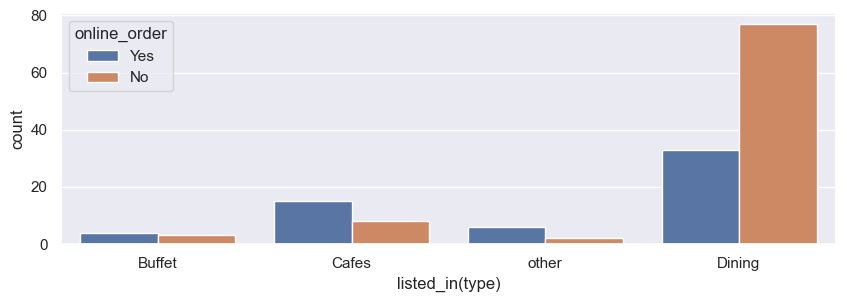

In [77]:
sns.countplot(data=df,x='listed_in(type)',hue='online_order')

In [81]:
neww = pd.crosstab(df["listed_in(type)"], df["online_order"])
neww



online_order,No,Yes
listed_in(type),,
Buffet,3,4
Cafes,8,15
Dining,77,33
other,2,6


<Axes: xlabel='online_order', ylabel='listed_in(type)'>

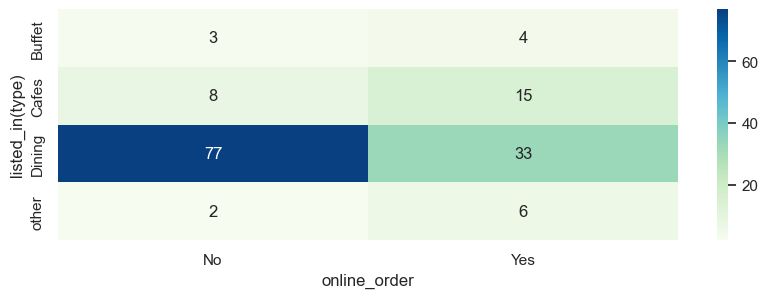

In [82]:
neww = pd.crosstab(df["listed_in(type)"], df["online_order"])
sns.heatmap(neww, cmap="GnBu", annot=True)


conclusion
*Customers prefer dining restaurants, typically spend around ₹300 for two, 
and rate their experience between 3.7–3.8 on average. Online ordering shows higher satisfaction levels, 
while offline orders are mainly linked to dine-in experiences.*